# Spherical Couplings

In [1]:
import os
import sys
from pathlib import Path

repo_root = Path(os.getcwd()).parent
sys.path.insert(0, str(repo_root))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from pipeline import harmony
from harmonia.reader import Couplings

plt.style.use(harmony)

In [3]:
storage = repo_root/"storage"/"processed"/"survey_products"

couplings = Couplings.load(
    storage/
    "couplings-(rmax=500.0,kmax=0.055,mask=random0_BOSS_DR12v5_CMASS_North,selection=[100.0,500.0]).npz"
)

In [4]:
M_indices = couplings._gen_operable_indices('angular')
Phi_indices = [
    index for index, wavenumber in sorted(
        couplings.disc.wavenumbers.items(), key=lambda entry: entry[1]
    )
]

In [5]:
ang_coupling_mat = np.zeros((len(M_indices),)*2, dtype=complex)
rad_coupling_mat = np.zeros((len(Phi_indices),)*2)

for row_idx, row in enumerate(ang_coupling_mat):
    for col_idx, col in enumerate(row):
        ang_coupling_mat[col_idx, row_idx] = couplings['angular', M_indices[row_idx], M_indices[col_idx]]
for row_idx, row in enumerate(rad_coupling_mat):
    for col_idx, col in enumerate(row):
        rad_coupling_mat[col_idx, row_idx] = couplings['radial', Phi_indices[row_idx], Phi_indices[col_idx]]

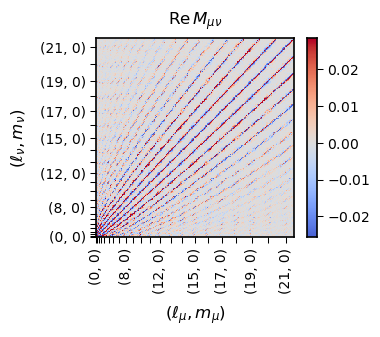

In [6]:
fig = plt.figure(figsize=(3.2, 3.5), dpi=100)

index_ticks, index_ticklabels = [], []
for mu_idx, mu in enumerate(M_indices):
    if mu[1] == 0:
        index_ticks.append(mu_idx + 0.5)
        if mu[0] in [21, 19, 17, 15, 12, 8, 0]:
            index_ticklabels.append(mu)
        else:
            index_ticklabels.append(None)

ax = sns.heatmap(
    np.real(ang_coupling_mat),
    cmap='coolwarm', center=0., robust=True, square=True,
    cbar_kws={
        'shrink': 0.75,
    },
    rasterized=True,
)

ax.invert_yaxis()
ax.tick_params(which='both', direction='out')
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.set_xticks(index_ticks)
ax.set_yticks(index_ticks)
ax.set_xticklabels(index_ticklabels)
ax.set_yticklabels(index_ticklabels)
ax.set_xlabel(r"$(\ell_\mu, m_\mu)$", labelpad=8)
ax.set_ylabel(r"$(\ell_\nu, m_\nu)$", labelpad=8)
ax.set_title(r"$\mathrm{Re}\,M_{\mu\nu}$", pad=10)

for _, spine in ax.spines.items():
    spine.set_visible(True)

cax = plt.gcf().axes[-1]
cax.tick_params(direction='out')
cax.set_frame_on(True)

fig.savefig(repo_root/"notebooks"/"publications"/"couplings_angular.pdf")

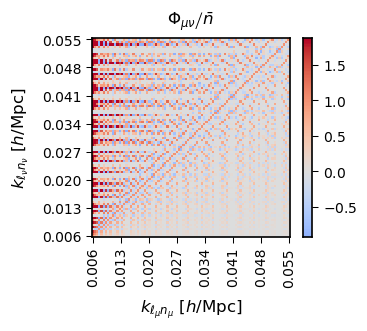

In [7]:
fig = plt.figure(figsize=(3.2, 3.5), dpi=100)

k_ticks = np.linspace(0.5, len(Phi_indices) - 0.5, 8)
k_ticklabels = [
    "{:.3f}".format(k)
    for k in np.linspace(
        min(couplings.disc.wavenumbers.values()),
        max(couplings.disc.wavenumbers.values()),
        8
    )
]

ax = sns.heatmap(
    rad_coupling_mat,
    cmap='coolwarm', center=0., robust=True, square=True,
    cbar_kws={
        'use_gridspec': False,
        'shrink': 0.75,
        # 'location': 'top',
    },
    rasterized=True,
)

ax.invert_yaxis()
ax.tick_params(which='both', direction='out')
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.set_xticks(k_ticks)
ax.set_yticks(k_ticks)
ax.set_xticklabels(k_ticklabels)
ax.set_yticklabels(k_ticklabels)
ax.set_xlabel(r"$k_{\ell_\mu n_\mu}$ [$h$/Mpc]", labelpad=8)
ax.set_ylabel(r"$k_{\ell_\nu n_\nu}$ [$h$/Mpc]", labelpad=8)
ax.set_title(r"$\left.\Phi_{\mu\nu}\right/\bar{n}$", pad=10)

for _, spine in ax.spines.items():
    spine.set_visible(True)

cax = plt.gcf().axes[-1]
cax.tick_params(direction='out')
cax.set_frame_on(True)

fig.savefig(repo_root/"notebooks"/"publications"/"couplings_radial.pdf")